# Point Configuration Transformation Visualizer

This notebook demonstrates the optimization of point configurations under periodic boundary conditions using different interaction kernels. For each kernel, we optimize a random initial configuration and then generate and visualize 6 random transformations (rotation + shift) from the symmetry group $O(d) \times \mathbb{T}^d$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from point_process_optimizer import PointProcessOptimizer

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
def optimize_and_visualize(kernel, kernel_name, n_points=20, d=2):
    """
    Optimizes a point configuration and visualizes 6 random transformations.
    """
    print(f"Processing {kernel_name}...")
    
    # 1. Initialize Optimizer with Periodic Boundaries (default)
    optimizer = PointProcessOptimizer(d=d, n=n_points, kernel=kernel, periodic=True)
    
    # 2. Generate Random Points
    X_initial = optimizer.generate_random_points()
    
    # 3. Optimize Positions
    optimizer.optimize(X_initial, pin_first_point=True)
    X_opt = optimizer.X_optimal
    
    print(f"Optimization completed for {kernel_name}.")
    
    # 4. Generate 6 Random Transformations
    transformations = []
    for _ in range(6):
        # Apply random rotation (including reflections)
        # Apply random rotation (including reflections)
        # Use discrete rotations to preserve periodic structure
        X_rot = optimizer.random_rotation(X_opt, continuous_rotation=False)
        # Apply random shift
        X_final = optimizer.random_shift(X_rot)
        transformations.append(X_final)
        
    # 5. Plot as 2x3 Array
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(f'Random Transformations of Optimised Configuration\nKernel: {kernel_name}', fontsize=16)
    
    for i, ax in enumerate(axes.flat):
        X = transformations[i]
        
        # Scatter plot for this transformation
        # Use a consistent color map to track individual points across transformations if desired,
        # or just uniform color.
        colors = plt.cm.viridis(np.linspace(0, 1, n_points))
        
        ax.scatter(X[:, 0], X[:, 1], c=colors, s=100, alpha=0.8, edgecolors='k')
        
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_aspect('equal')
        ax.set_title(f'Transformation {i+1}')
        ax.grid(True, linestyle='--', alpha=0.3)
        
        # Remove tick labels for cleaner look
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## 1. Coulomb Kernel (Repulsive)
Standard repulsive potential $K(r) = 1/r$.

Processing Coulomb (1/r)...
Optimization completed for Coulomb (1/r).


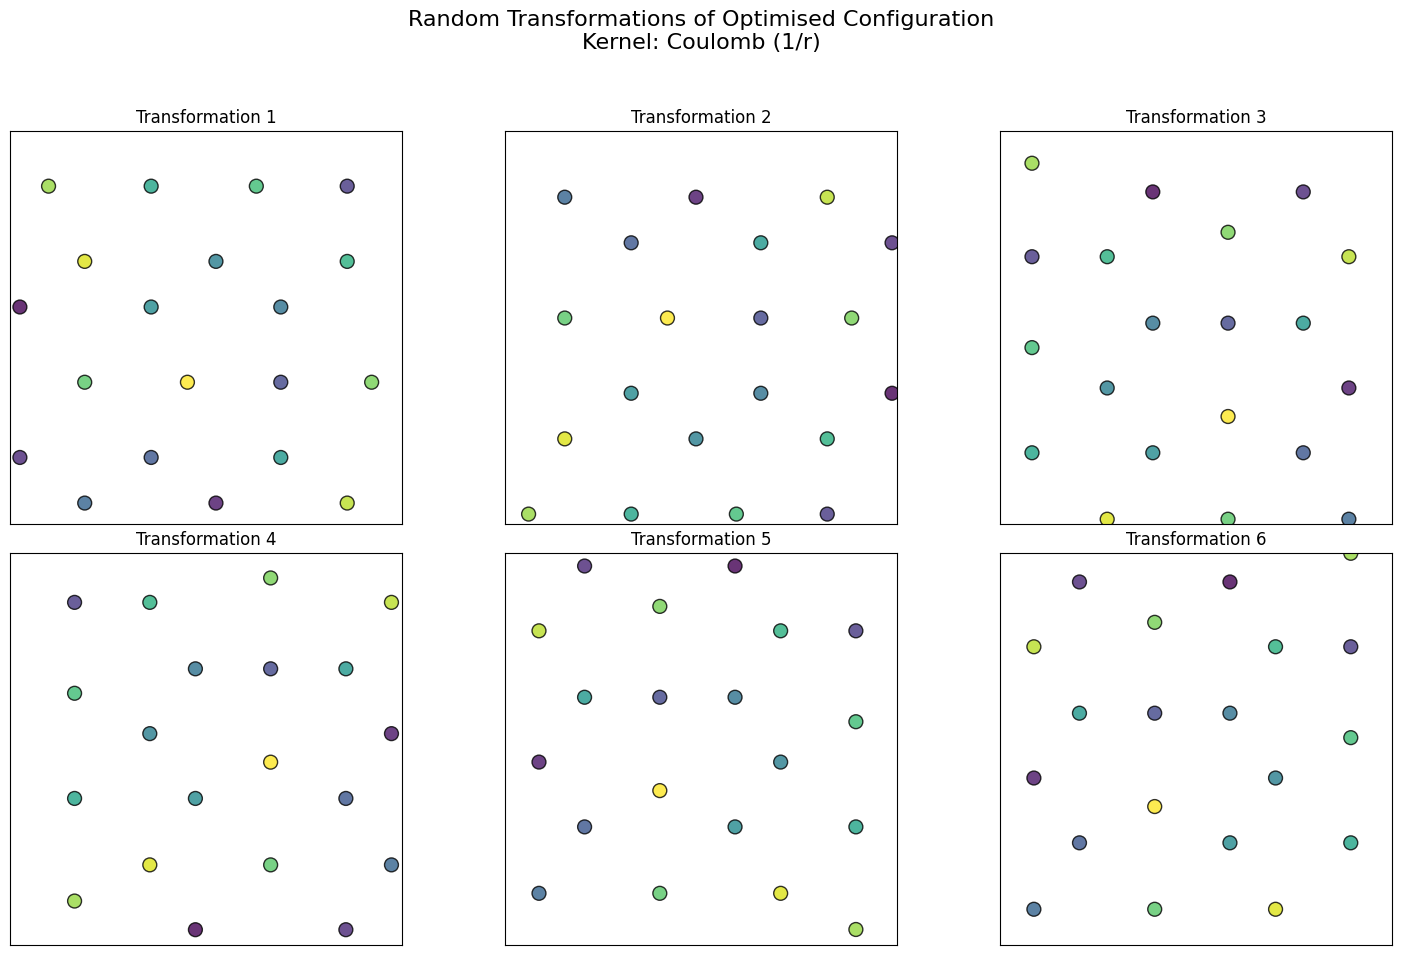

In [3]:
# Coulomb Kernel
kernel_coulomb = lambda r: 1.0 / (r + 1e-10)

optimize_and_visualize(kernel_coulomb, "Coulomb (1/r)")

## 2. Lennard-Jones-like Kernel
Repulsive at short range, attractive at long range.
$$ K(r) = \left(\frac{1}{r+\epsilon}\right)^{12} - 2\left(\frac{1}{r+\epsilon}\right)^{6} $$

Processing Lennard-Jones Like...


Optimization completed for Lennard-Jones Like.


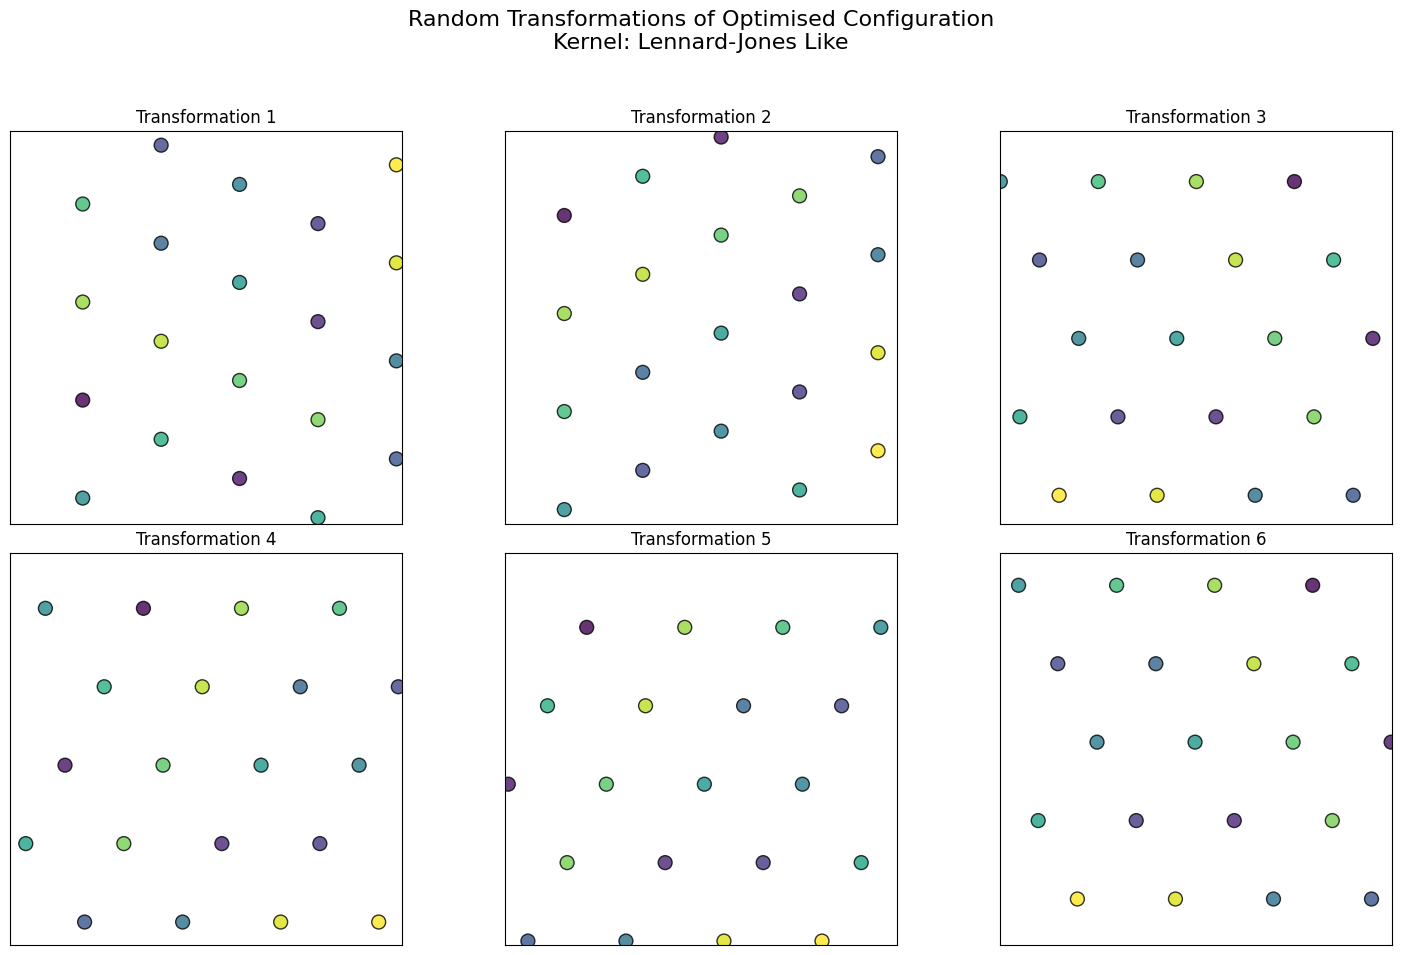

In [4]:
# Lennard-Jones like kernel
kernel_lj = lambda r: (1/(r+0.1))**12 - 2*(1/(r+0.1))**6

optimize_and_visualize(kernel_lj, "Lennard-Jones Like")

## 3. Gaussian Kernel
Soft repulsive core.
$$ K(r) = e^{-r^2 / \sigma} $$

Note that a wide Gaussian kernel (e.g. sigma=0.5) may cause points to collapse thus producing smaller number of clusters.

Processing Gaussian...
Optimization completed for Gaussian.


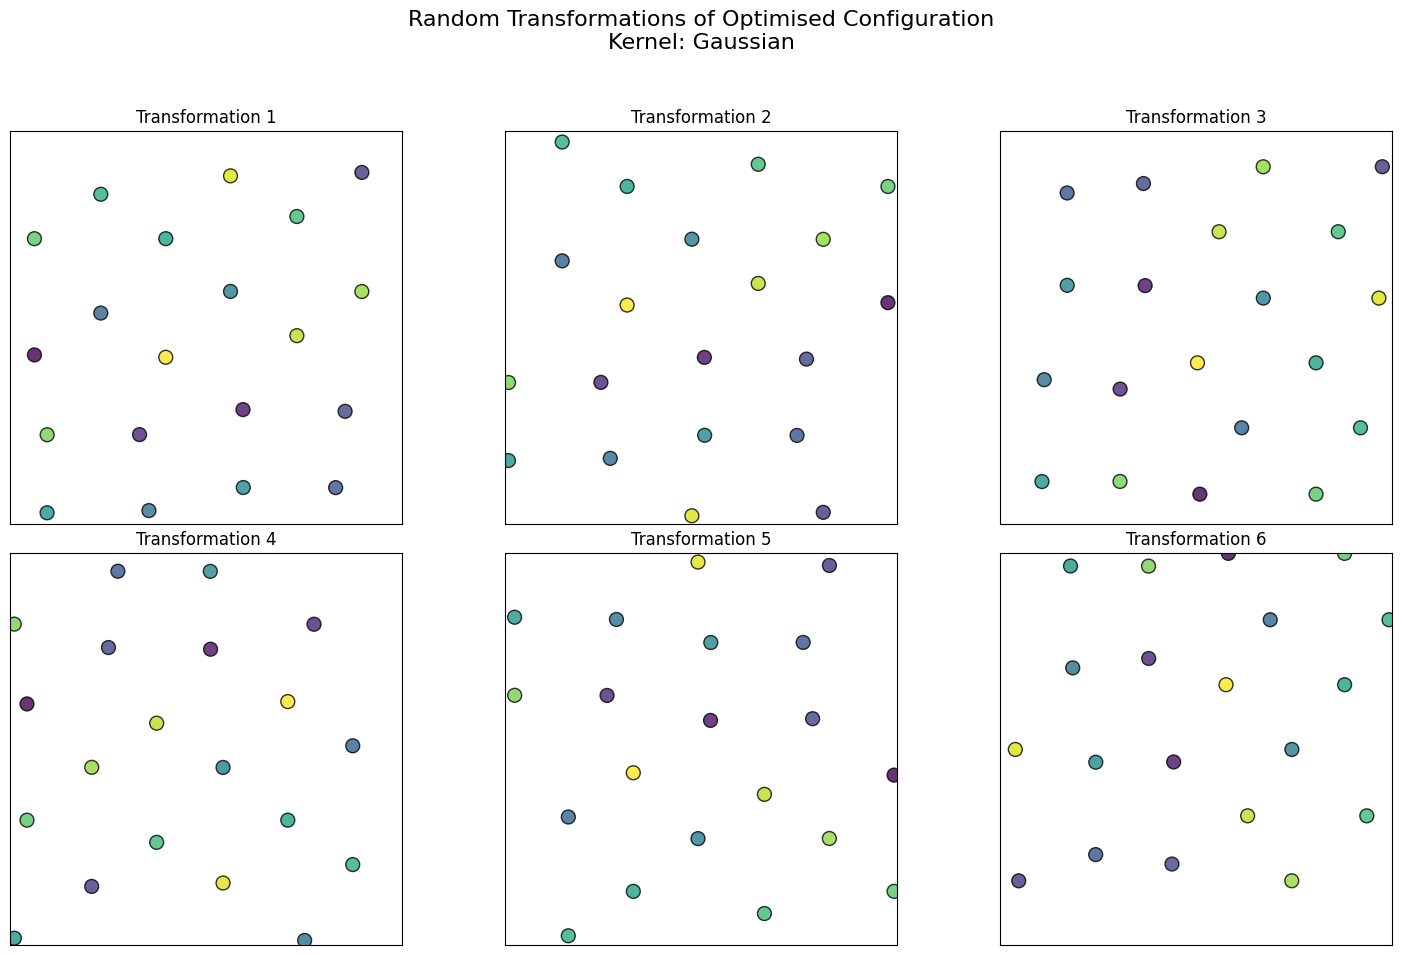

In [8]:
# Gaussian kernel
kernel_gauss = lambda r: np.exp(-r**2 / 0.05)

optimize_and_visualize(kernel_gauss, "Gaussian", n_points=20)

## 4. Gamma Kernel
Gamma repulsive core.
$$ K(r) = e^{r^{-1/2}/ \sigma} $$

Processing Gamma...
Optimization completed for Gamma.


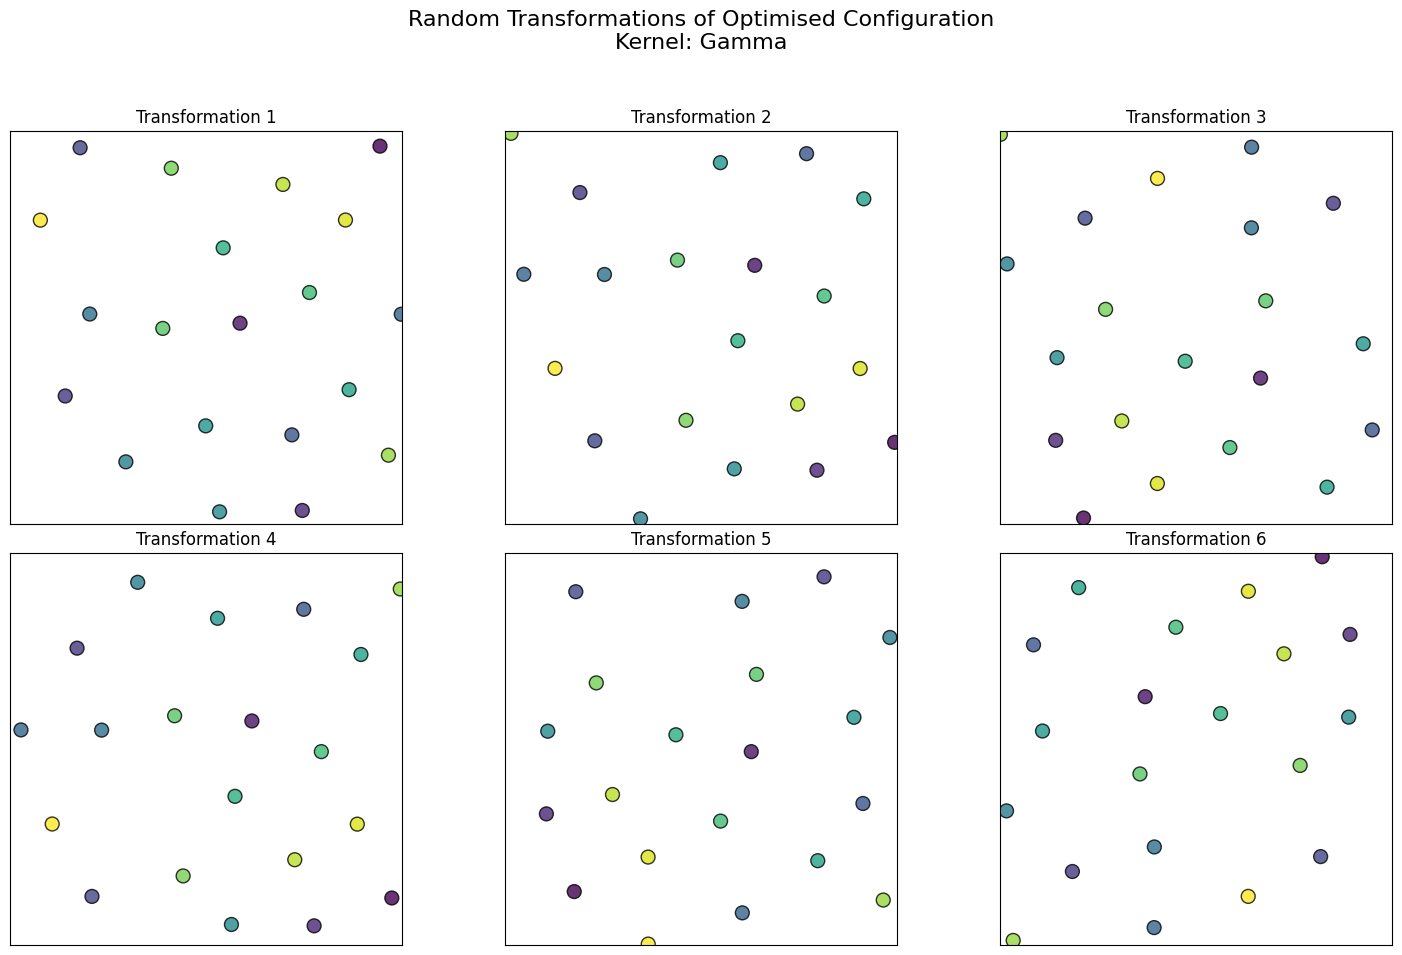

In [14]:
# Gamma kernel
kernel_gamma = lambda r: np.exp(r**(-1/2) / 0.1)

optimize_and_visualize(kernel_gamma, "Gamma", n_points=20)